In [46]:
import pandas as pd
import matplotlib

2 method:
First Load then change the columns to the datetime object
                            OR
We can also convert column to datetimme object while loading the data.

In [7]:
# d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
# df = pd.read_csv('dataset\ETH_1h.csv' , parse_dates= ['Date'], date_parser=d_parser)

df = pd.read_csv('dataset\ETH_1h.csv')

In [8]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [9]:
df.shape

(23674, 7)

Converting str object to datetime

In [10]:
df.loc[0, 'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

this means it is not a datetime object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Pandas will try to do everything to change it into a datetime object but 
# the condition is that it should be formated in the required format that is
# asked for the datetime object, but the situation is not quite the same in
# the above operation so it will give an error

ParserError: Unknown string format: 2020-03-13 08-PM

In this condiotion, You have to explicitly specify how the date is formated so that it can parse this correctly 

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %I-%p')

In [13]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [14]:
df.loc[0,'Date'].day_name()
# for single value

'Friday'

In [15]:
df['Date'].dt.day_name()
# for all the values in columns
# we can access the dt class and call the datetime methods that way

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [16]:
df['DayofWeek'] = df['Date'].dt.day_name()

In [17]:
df

,Date,Symbol,Open,High,Low,Close,Volume,DayofWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [18]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [19]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

we can actually subtract the date in order to view the time between those two dates

In [20]:
df['Date'].max()-df['Date'].min()

Timedelta('986 days 09:00:00')

Filters by Date

In [21]:
filt = (df['Date'] >= '2020')
df[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayofWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [22]:
# filt = (df['Date'] >= '2019') & (df['Date'] < '2020')

# or you can pass in the date time object also (by converting str to datetime object)
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))



df[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayofWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [ ]:
# filtering data by slicing since the all the datetime value is unique

df.set_index('Date', inplace= True)

In [26]:
df

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


Slicing

In [28]:
#  you can also use loc

df['2019']
# df['2019':'2020]

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [29]:
df['2019-01': '2019-02']

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2019-02-28 23:00:00,ETHUSD,134.68,135.53,134.40,134.48,350372.86,Thursday
2019-02-28 22:00:00,ETHUSD,135.13,135.13,134.25,134.68,331870.37,Thursday
2019-02-28 21:00:00,ETHUSD,134.99,135.37,134.86,135.13,330511.15,Thursday
2019-02-28 20:00:00,ETHUSD,135.57,135.60,134.37,134.99,1023140.26,Thursday
2019-02-28 19:00:00,ETHUSD,136.00,137.50,134.17,135.57,1208793.69,Thursday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [33]:
df['2019-01': '2019-02']['Close'].mean()

126.00999999999998

In [34]:
df['2019-01': '2019-02'].head(24)

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2019-02-28 23:00:00,ETHUSD,134.68,135.53,134.40,134.48,350372.86,Thursday
2019-02-28 22:00:00,ETHUSD,135.13,135.13,134.25,134.68,331870.37,Thursday
2019-02-28 21:00:00,ETHUSD,134.99,135.37,134.86,135.13,330511.15,Thursday
2019-02-28 20:00:00,ETHUSD,135.57,135.60,134.37,134.99,1023140.26,Thursday
2019-02-28 19:00:00,ETHUSD,136.00,137.50,134.17,135.57,1208793.69,Thursday
2019-02-28 18:00:00,ETHUSD,135.00,136.41,134.29,136.00,458157.32,Thursday
2019-02-28 17:00:00,ETHUSD,135.69,136.22,133.50,135.00,759285.46,Thursday
2019-02-28 16:00:00,ETHUSD,136.48,137.47,133.67,135.69,1990531.65,Thursday
2019-02-28 15:00:00,ETHUSD,136.29,139.00,131.66,136.48,3182453.99,Thursday


In [36]:
df['2018-06-23']['High']

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_8936\3395717979.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018-06-23']['High']


Date
2018-06-23 23:00:00    477.61
2018-06-23 22:00:00    481.74
2018-06-23 21:00:00    480.00
2018-06-23 20:00:00    476.37
2018-06-23 19:00:00    476.97
2018-06-23 18:00:00    474.42
2018-06-23 17:00:00    474.47
2018-06-23 16:00:00    473.03
2018-06-23 15:00:00    472.69
2018-06-23 14:00:00    474.34
2018-06-23 13:00:00    473.33
2018-06-23 12:00:00    473.89
2018-06-23 11:00:00    477.35
2018-06-23 10:00:00    474.75
2018-06-23 09:00:00    474.40
2018-06-23 08:00:00    470.00
2018-06-23 07:00:00    469.33
2018-06-23 06:00:00    465.53
2018-06-23 05:00:00    473.00
2018-06-23 04:00:00    471.70
2018-06-23 03:00:00    474.99
2018-06-23 02:00:00    475.93
2018-06-23 01:00:00    472.42
2018-06-23 00:00:00    474.77
Name: High, dtype: float64

In [37]:
df['2018-06-23']['High'].max()

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_8936\1568610710.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018-06-23']['High'].max()


481.74

Resampling

In [42]:
highs_avg = df['High'].resample('D').mean()
highs_max = df['High'].resample('D').max()
#  returns value of the avg value achieved on each day

In [54]:
highs_max['2018-11-11']

211.17

In [55]:
!matplotlib.inline

'matplotlib.inline' is not recognized as an internal or external command,
operable program or batch file.


<AxesSubplot:xlabel='Date'>

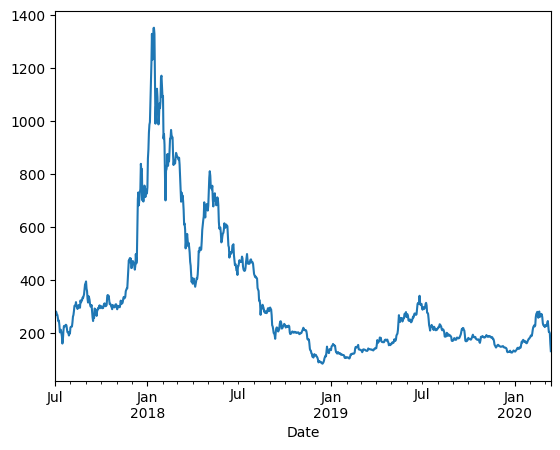

In [56]:
highs_avg.plot()

In [57]:
df.resample('W').mean()
# took the average of the weekdays and display

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [58]:
df.resample('W').agg({'Close': 'mean' ,'High': 'max', 'Low': 'min', 'Volume':'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08
